In [283]:

import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None

In [284]:
path = "C:\\Users\\HOME\\PycharmProjects\\ML_Titanic_SurvivalPrediction\\data"

In [285]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\HOME\PycharmProjects\ML_Titanic_SurvivalPrediction\data\test.csv
C:\Users\HOME\PycharmProjects\ML_Titanic_SurvivalPrediction\data\train.csv


## Loading data

In [286]:
train_data = pd.read_csv("C:\\Users\\HOME\\PycharmProjects\\ML_Titanic_SurvivalPrediction\\data\\train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [287]:
test_data = pd.read_csv("C:\\Users\\HOME\\PycharmProjects\\ML_Titanic_SurvivalPrediction\\data\\test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [288]:
"""
'PassengerId', 'Survived', 'Pclass', Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'
"""

train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Cleaning the data

In [289]:
train_data.duplicated().sum()

0

In [290]:
test_data.duplicated().sum()

0

In [291]:
pd.DataFrame(round(train_data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [292]:
pd.DataFrame(round(test_data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,21.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000
Cabin,78.000000


In [293]:
train_data['Age'] = train_data['Age'].fillna(train_data.groupby(['Sex', 'SibSp', 'Parch', 'Pclass'])['Age'].transform('mean'))
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [294]:
test_data['Age'] = train_data['Age'].fillna(train_data.groupby(['Sex', 'SibSp', 'Parch', 'Pclass'])['Age'].transform('mean'))
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,22.000000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,26.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,35.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.000000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,33.904762,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,44.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,23.565789,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,34.000000,0,0,359309,8.0500,NaN,S


In [295]:
pd.DataFrame(round(train_data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,1.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [296]:
pd.DataFrame(round(test_data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,1.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000
Cabin,78.000000


### Final data for training

In [297]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [298]:
train = train_data[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
test = test_data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

In [299]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [300]:
train['Survived'].value_counts() # the target is balanced

0    549
1    342
Name: Survived, dtype: int64

In [301]:
train.corr() # ok

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.043600,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.071381,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.402760,0.083081,0.018443,-0.549500
Age,0.043600,-0.071381,-0.402760,1.000000,-0.319810,-0.199048,0.113653
SibSp,-0.057527,-0.035322,0.083081,-0.319810,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.199048,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.113653,0.159651,0.216225,1.000000


## Exploratory DA

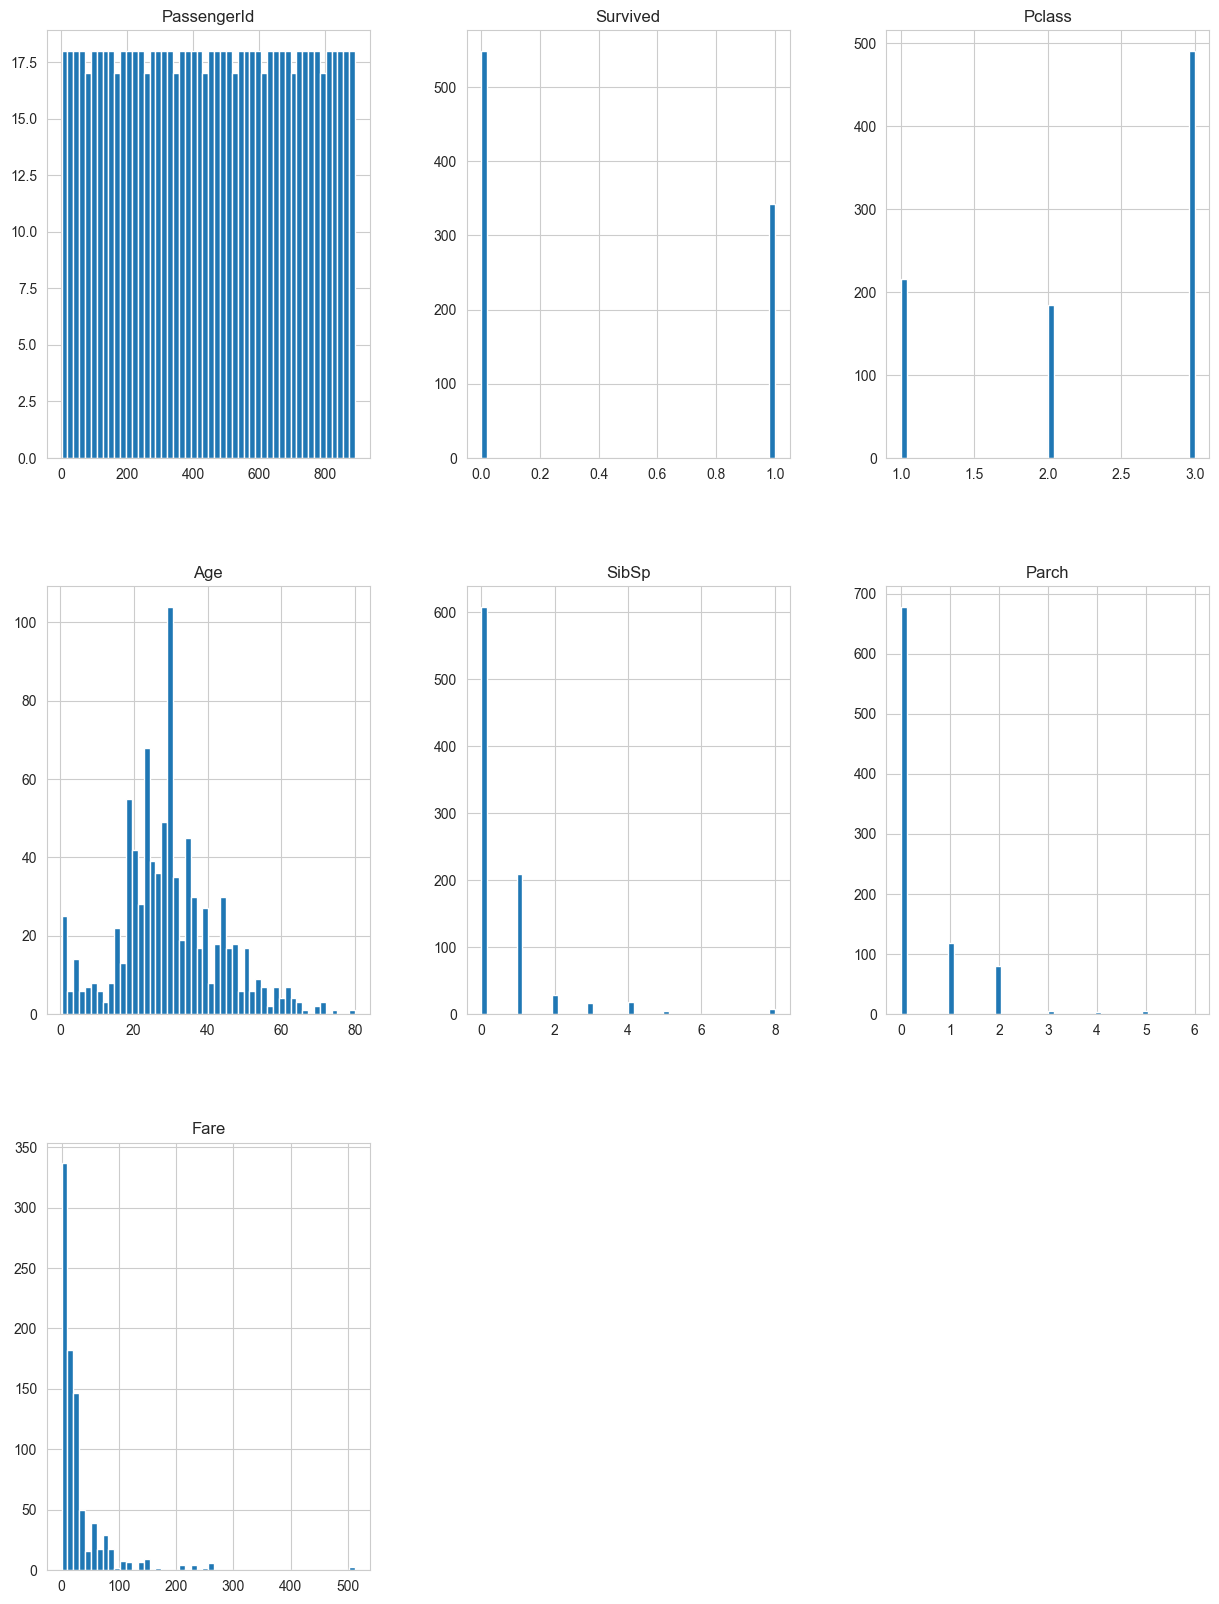

In [302]:
train.hist(bins=50, figsize=(15, 20));
None

In [303]:
women = train.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [304]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [305]:
def desc_stat(data, column):
    # descriptive statistics
    print(data[column].describe())
    data.boxplot(column=column, figsize=(3,7));
    plt.title('Descriptive Statistics')
    plt.show()
    data[column].hist(bins=30, range=(0, 110), figsize=(15, 5));

count    883.000000
mean      29.684771
std       13.486454
min        0.420000
25%       22.000000
50%       29.184492
75%       36.750000
max       80.000000
Name: Age, dtype: float64


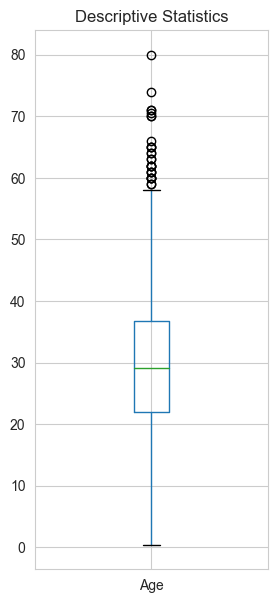

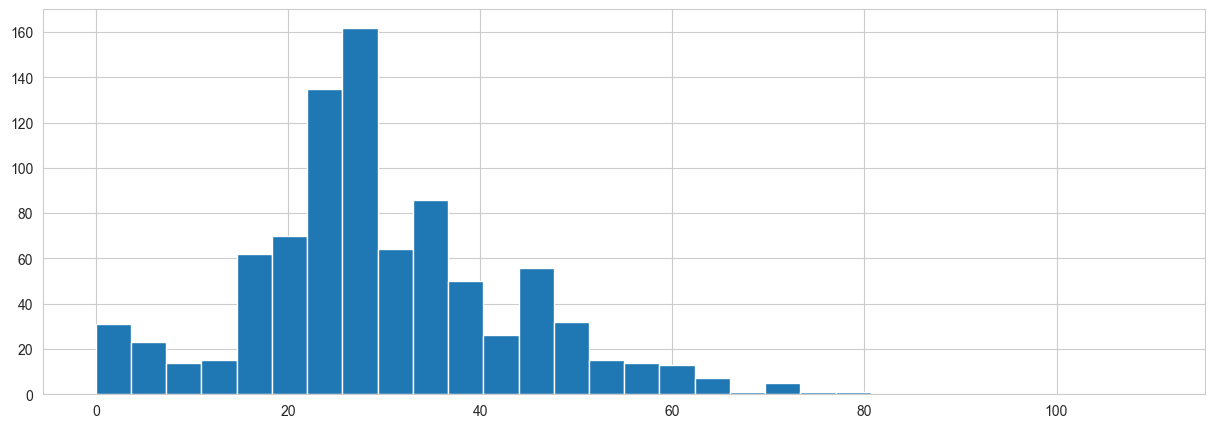

In [306]:
desc_stat(train, 'Age')

## Models

```
- 75% train_data
- 25% test_data
```

In [307]:
RANDOM_STATE = 7042023

In [308]:
train_d, test_d = train_test_split(train, test_size=0.25, random_state=RANDOM_STATE)

print('Train sample shape:', train_d.shape[0])
print('Test sample shape:', test_d.shape[0])

Train sample shape: 668
Test sample shape: 223


In [309]:
test_d.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

### Labels encoding

* 'Sex'
* 'Embarked'

In [310]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          883 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [311]:
train_d.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [312]:
test_d.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [313]:
# define ordinal encoding
ordinalencoder = OrdinalEncoder()

In [314]:
# transform data
result_train = ordinalencoder.fit_transform(train_d[['Embarked',
                                                     'Sex']])

result_train = pd.DataFrame(result_train)

print(type(result_train))
result_train.head(3)

<class 'pandas.core.frame.DataFrame'>


,0,1
0,2.0,1.0
1,2.0,1.0
2,1.0,1.0


In [315]:
# transform data
result_test = ordinalencoder.transform(test_d[['Embarked',
                                                     'Sex']])

result_test = pd.DataFrame(result_test)

print(type(result_test))
result_test.head(3)

<class 'pandas.core.frame.DataFrame'>


,0,1
0,2.0,1.0
1,2.0,1.0
2,0.0,1.0


In [316]:
# transform data
res_test = ordinalencoder.transform(test[['Embarked',
                                                     'Sex']])

res_test = pd.DataFrame(res_test)

print(type(res_test))
res_test.head(3)

<class 'pandas.core.frame.DataFrame'>


,0,1
0,1.0,1.0
1,2.0,0.0
2,1.0,1.0


In [317]:
columns = ['Embarked','Sex']

In [318]:
result_train.columns = columns
result_test.columns = columns
res_test.columns = columns

train_enc = result_train.join(train_d[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',  'Fare']].reset_index(drop=True))

test_enc = result_test.join(test_d[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',  'Fare']].reset_index(drop=True))

test_encoded = res_test.join(test[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].reset_index(drop=True))

train_dropped = train_enc
test_dropped = test_enc
test_encoded_dropped = test_encoded

In [319]:
train_dropped.isna().sum().sum()

7

In [320]:
test_dropped.isna().sum().sum()

3

In [321]:
test_encoded_dropped.isna().sum().sum()

5

In [322]:
train_dropped = train_dropped.dropna()
test_dropped = test_dropped.dropna()
# test_encoded_dropped = test_encoded_dropped.dropna()

In [323]:
train_dropped.isna().sum().sum()

0

In [324]:
test_dropped.isna().sum().sum()

0

In [325]:
test_encoded_dropped.isna().sum().sum()

5

### Sampling X_train, y_train, X_test, y_test

In [180]:
X_train = train_dropped.drop(['Survived'], axis=1)
y_train = train_dropped['Survived']

X_test = test_dropped.drop(['Survived'], axis=1)
y_test = test_dropped['Survived']

print('Train sample (features):', X_train.shape[0])
print('Train sample (target)', y_train.shape[0])
print()
print('Тest sample (features):', X_test.shape[0])
print('Тest sample (target)', y_test.shape[0])

Train sample (features): 661
Train sample (target) 661

Тest sample (features): 220
Тest sample (target) 220


### 1) Decision Tree

In [182]:
%%time
# Initiating and building Decision Tree model
parameters_dt = {
    'max_depth': [2, 3, 4, 5],
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

grid_DT = GridSearchCV(dt, param_grid=parameters_dt)

best_decision_tree_model = grid_DT.fit(X_train, y_train)

print('The best parameters for Decision Tree: {}'.format(best_decision_tree_model.best_params_))

The best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
CPU times: total: 93.8 ms
Wall time: 552 ms


### 2) Random Forest

In [183]:
%%time
# Initiating and building Random Forest Regressor model
parameters_rf = {
    'n_estimators': [5, 10, 20, 50],
    'max_depth': [2, 3, 7],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
grid_RF = GridSearchCV(estimator=rf_model, param_grid=parameters_rf)
best_random_forest_model = grid_RF.fit(X_train, y_train)
print('The best parameters for Random Forest: {}'.format(best_random_forest_model.best_params_))

The best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 50}
CPU times: total: 4.3 s
Wall time: 4.73 s


### 3) Gradient Boosting

In [184]:
%%time
param_grid={'n_estimators':[5,10],
            'learning_rate': [0.1,0.04,0.05,0.02],
            'max_depth':[4],
            'min_samples_leaf':[3],
            'max_features':[1.0] }
n_jobs=4

estimator = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_classifier = GridSearchCV(estimator=estimator,
                          cv=5,
                          param_grid=param_grid,
                          n_jobs=n_jobs)

best_gb_model = gb_classifier.fit(X_train, y_train)
print('The best parameters for Gradient Descent: {}'.format(best_gb_model.best_params_))

The best parameters for Gradient Descent: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 10}
CPU times: total: 31.2 ms
Wall time: 2.03 s


### 4) CatBoost Classifier

In [191]:
%%time

param_grid={'n_estimators':[5,10],
            'learning_rate': [0.1,0.04,0.05,0.02],
            'max_depth':[4]
            # 'min_samples_leaf':[3]
            # 'max_features':[1.0]
            }
n_jobs=4

estimator = CatBoostClassifier(random_state=RANDOM_STATE)

catboost_classifier = GridSearchCV(estimator=estimator,
                          cv=5,
                          param_grid=param_grid,
                          n_jobs=n_jobs)

best_catboost_model = catboost_classifier.fit(X_train, y_train)
print('The best parameters for CatBoost: {}'.format(best_catboost_model.best_params_))

0:	learn: 0.6546698	total: 143ms	remaining: 1.29s
1:	learn: 0.6282629	total: 144ms	remaining: 576ms
2:	learn: 0.6094037	total: 145ms	remaining: 337ms
3:	learn: 0.5892805	total: 147ms	remaining: 220ms
4:	learn: 0.5722432	total: 147ms	remaining: 147ms
5:	learn: 0.5573637	total: 148ms	remaining: 98.6ms
6:	learn: 0.5422242	total: 149ms	remaining: 63.7ms
7:	learn: 0.5268031	total: 149ms	remaining: 37.3ms
8:	learn: 0.5190897	total: 150ms	remaining: 16.6ms
9:	learn: 0.5089312	total: 150ms	remaining: 0us
The best parameters for CatBoost: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 10}
CPU times: total: 31.2 ms
Wall time: 2.65 s


## Comparing the models by cross validation

In [192]:
# Decision Tree
best_score_dt = round(best_decision_tree_model.best_score_, 5)
print('Best score Decision Tree: {}'.format(best_score_dt))

train_predicted_dt = best_decision_tree_model.predict(X_train)
print("TRAIN Decision Tree Model, F1:", f1_score(y_train, train_predicted_dt))

Best score Decision Tree: 0.80488
TRAIN Decision Tree Model, F1: 0.8017817371937639


In [195]:
# Random Forest
best_score_rf = round(best_random_forest_model.best_score_, 5)
print('Best score Random Forest: {}'.format(best_score_rf))

train_predicted_rf = best_random_forest_model.predict(X_train)
print("TRAIN Random Forest Model, F1:", f1_score(y_train, train_predicted_rf))

Best score Random Forest: 0.81546
TRAIN Random Forest Model, F1: 0.8633405639913233


In [199]:
# Gradient Boosting
best_score_gb = round(best_gb_model.best_score_, 5)
print('Best score Gradient Boosting: {}'.format(best_score_gb))

train_predicted_gb = best_gb_model.predict(X_train)
print("TRAIN Random Gradient Boosting, F1:", f1_score(y_train, train_predicted_gb))

Best score Gradient Boosting: 0.81998
TRAIN Random Gradient Boosting, F1: 0.7695852534562211


In [200]:
# CatBoost Classifier
best_score_catboost = round(best_catboost_model.best_score_, 5)
print('Best score CatBoost: {}'.format(best_score_catboost))

train_predicted_catboost = best_catboost_model.predict(X_train)
print("TRAIN CatBoost Model, F1:", f1_score(y_train, train_predicted_catboost))

Best score CatBoost: 0.78666
TRAIN CatBoost Model, F1: 0.7121535181236673


### *Conclusion:* The highest score in cross-validation was achieved by the Random Forest model with an F1 score of 0.8633.

## Testing the best model (Random Forest) on the test set and making test predictions (on the unseen data).

In [201]:
test_predicted_rf = best_random_forest_model.predict(X_test)
print("TEST RF Model, F1:", f1_score(y_test, test_predicted_rf))

TEST RF Model, F1: 0.7547169811320754


### Predictions on the unseen data + filling missing values

In [221]:
test_data['Age'].mean()

28.712862370280348

In [326]:
# test_encoded_dropped['Age'] = test_encoded_dropped['Age'].fillna(train_data.groupby(['Sex', 'SibSp', 'Parch', 'Pclass'])['Age'].transform('mean'))
# test_encoded_dropped.isna(from sklearn.impute import KNNImputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
test_encoded_dropped['Age'] = imputer.fit_transform(test_encoded_dropped[['Age']])
test_encoded_dropped.isna().sum().sum()

1

In [327]:
test_encoded_dropped['Fare'] = test_encoded_dropped['Fare'].fillna(test_encoded_dropped['Fare'].mean())
test_encoded_dropped.isna().sum().sum()

0

In [328]:
test_encoded_dropped['Fare'] = test_encoded_dropped['Fare'].fillna(test_encoded_dropped['Fare'].median())
test_encoded_dropped.isna().sum().sum()

0

In [329]:
test_encoded_dropped['Age'] = test_encoded_dropped['Age'].fillna(29)
test_encoded_dropped.isna().sum().sum()

0

In [330]:
missing_rows = test_encoded_dropped[test_encoded_dropped['Age'].isnull()]
print(missing_rows)

Empty DataFrame
Columns: [Embarked, Sex, PassengerId, Pclass, Age, SibSp, Parch, Fare]
Index: []


In [331]:
test_encoded_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Embarked     418 non-null    float64
 1   Sex          418 non-null    float64
 2   PassengerId  418 non-null    int64  
 3   Pclass       418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [332]:
from sklearn.impute import SimpleImputer

# Filling missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
test_encoded_dropped_imputed = pd.DataFrame(imputer.fit_transform(test_encoded_dropped), columns=test_encoded_dropped.columns)

# Check if there are any missing values left
test_encoded_dropped_imputed.isna().sum().sum()

0

In [333]:
predictions = best_random_forest_model.predict(test_encoded_dropped)

In [334]:
output = pd.DataFrame({'PassengerId': test_encoded_dropped.PassengerId, 'Survived': predictions})
output.to_csv("C:\\Users\\HOME\\PycharmProjects\\ML_Titanic_SurvivalPrediction\\submission.csv", index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
